In [1]:
import pandas as pd
df= pd.read_csv('standardized_features.csv')

In [2]:
X = df.drop(columns=['Converted'])
y = df['Converted']    

MODEL TRAINING USING FOUR MODELS

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# SVM Model
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
    
# Random Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# LightGBM Model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

print(f'Classification Report - logistic regression:\n{class_report}')

print(f'Classification Report - SVM:\n{class_report_svm}')   

print(f'Classification Report - Random Forest:\n{class_report_rf}')

print(f'Classification Report - LightGBM:\n{class_report_lgbm}')


c:\DATASCIENCE\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report - logistic regression:
              precision    recall  f1-score   support

           0       0.86      0.82      0.83      1107
           1       0.74      0.79      0.77       741

    accuracy                           0.81      1848
   macro avg       0.80      0.80      0.80      1848
weighted avg       0.81      0.81      0.81      1848

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1107
           1       0.61      0.47      0.53       741

    accuracy                           0.67      1848
   macro avg       0.65      0.63      0.63      1848
weighted avg       0.66      0.67      0.66      1848

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1107
           1       0.96      0.98      0.97       741

    accuracy                           0.97      1848
   macro avg   

CONFUSION MATRIX FOR MODELS

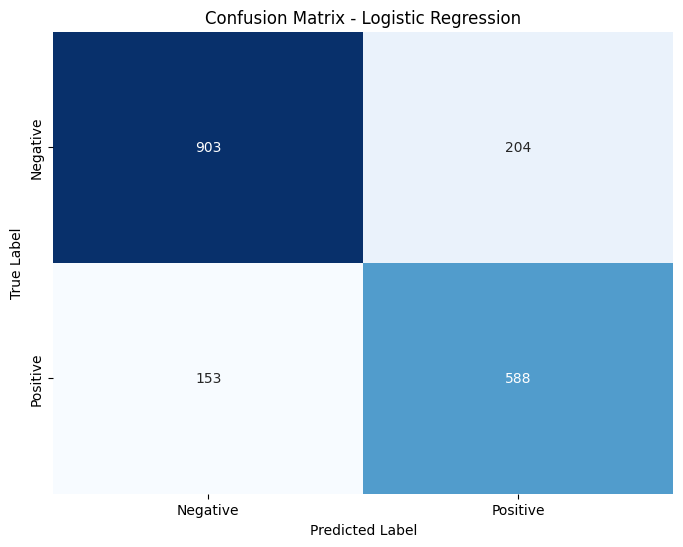

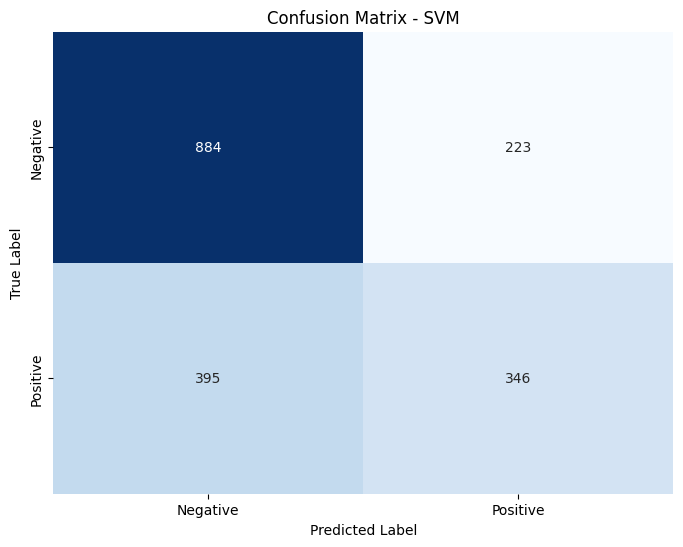

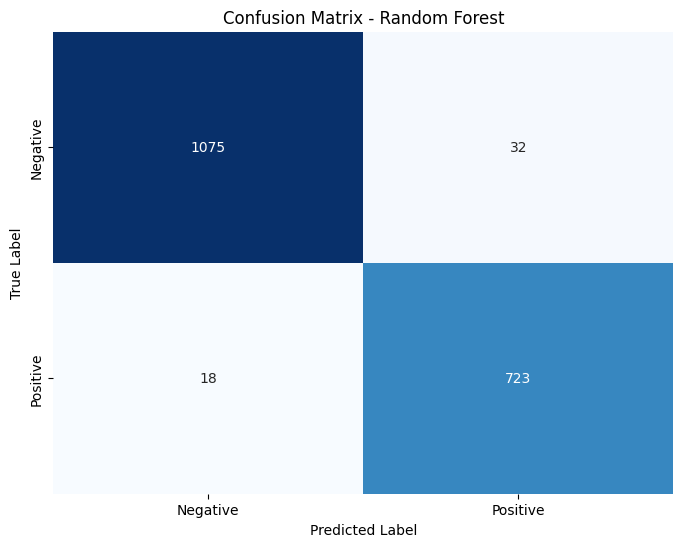

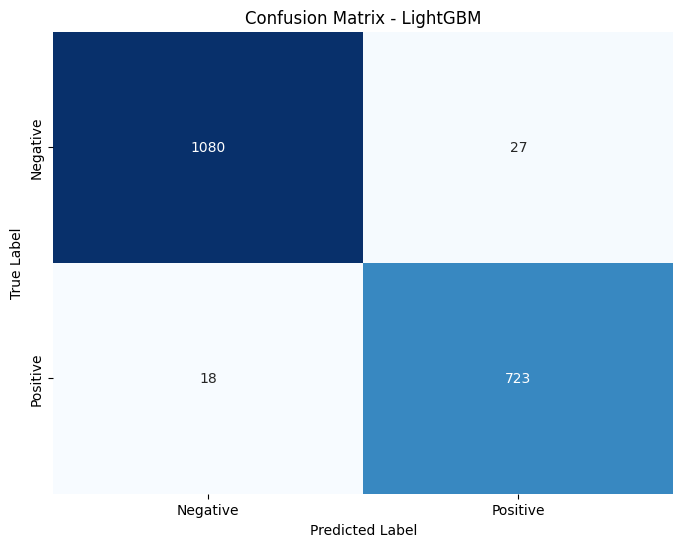

In [79]:


# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix, 'Logistic Regression')
plot_confusion_matrix(conf_matrix_svm, 'SVM')
plot_confusion_matrix(conf_matrix_rf, 'Random Forest')
plot_confusion_matrix(conf_matrix_lgbm, 'LightGBM')

HYPER PARAMETER TUNING FOR LIGHTGBM

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution
param_dist = {
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [1, 5, 10],
    'class_weight': ['balanced', None]
}

# Initialize the model
lgbm_model = LGBMClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  # Number of parameter settings to sample
                                   scoring='accuracy', 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'num_leaves': 100, 'n_estimators': 200, 'min_data_in_leaf': 20, 'max_depth': 30, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'class_weight': 'balanced', 'bagging_freq': 1, 'bagging_fraction': 0.9}
Best Cross-Validation Score: 0.9779


HYPER PARAMETER TUNING FOR SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly' kernels
}
#
# Initialize the SVM model
svm_model = SVC()

# Set up GridSearchCV with k-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, 
                                param_grid=param_grid_svm, 
                                scoring='accuracy', 
                                cv=5,  # 5-fold cross-validation
                                verbose=1, 
                                n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best Cross-Validation Score for SVM: {best_score_svm:.4f}")

# Evaluate the best model on the test set
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

# Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Print accuracy on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Set Accuracy for SVM: {accuracy_svm:.4f}")

HYPER PARAMETER TUNING FOR RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Optional: to handle class imbalance
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Set up GridSearchCV with k-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, 
                               param_grid=param_grid_rf, 
                               scoring='accuracy', 
                               cv=5,  # 5-fold cross-validation
                               verbose=1, 
                               n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Score for Random Forest: {best_score_rf:.4f}")

# Evaluate the best model on the test set
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Print accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Set Accuracy for Random Forest: {accuracy_rf:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'class_weight': None, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.9746
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1107
           1       0.96      0.97      0.97       741

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848

Test Set Accuracy for Random Forest: 0.9746


HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and elasticnet
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Set up GridSearchCV with k-fold cross-validation
grid_search_lr = GridSearchCV(estimator=lr_model, 
                               param_grid=param_grid_lr, 
                               scoring='accuracy', 
                               cv=5,  # 5-fold cross-validation
                               verbose=1, 
                               n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Score for Logistic Regression: {best_score_lr:.4f}")

# Evaluate the best model on the test set
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Print accuracy on the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Test Set Accuracy for Logistic Regression: {accuracy_lr:.4f}")

ACCURACY SCORE FOR TRAINING AND TESTING SET FOR LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8061
Test Accuracy: 0.8068


c:\DATASCIENCE\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR SVM

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
svm_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6807
Test Accuracy: 0.6656


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9989
Test Accuracy: 0.9729


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR LIGHTGBM

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
lgbm_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2820, number of negative: 4572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 7392, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381494 -> initscore=-0.483214
[LightGBM] [Info] Start training from score -0.483214
Training Accuracy: 0.9922
Test Accuracy: 0.9767


LIGHTGBM BEST MODEL FOR TRAIN,TEST,PREDICTION DATASETS

Training set: 5544 samples
Test set: 1848 samples
Prediction set: 1848 samples

Fold 1 Accuracy: 0.9702
Fold 2 Accuracy: 0.9739
Fold 3 Accuracy: 0.9757
Fold 4 Accuracy: 0.9757
Fold 5 Accuracy: 0.9747

Average Cross-Validation Accuracy: 0.9740

Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1136
           1       0.96      0.97      0.97       712

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848


Prediction Set Performance:
Accuracy: 0.9784
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1136
           1       0.97      0.98      0.97       712

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



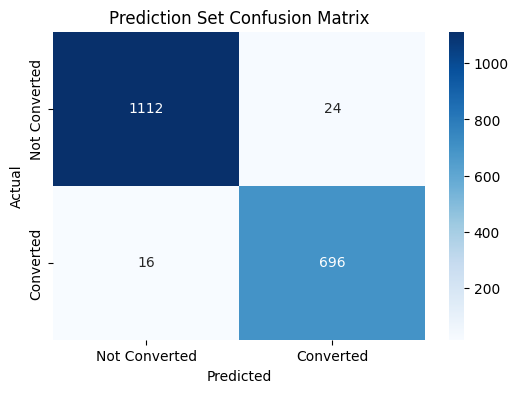


Predictions saved to 'predictions_with_analysis.csv'

Feature Importance:
                                  Feature  Importance
7                        Engagement_Score         889
5                                    Tags         661
2                           Last_Activity         385
3                          Specialization         372
8                      Lead_Quality_Score         245
1                             Lead_Source         183
4         What_is_your_current_occupation         121
0                             Lead_Origin          79
6  A_free_copy_of_Mastering_The_Interview          65


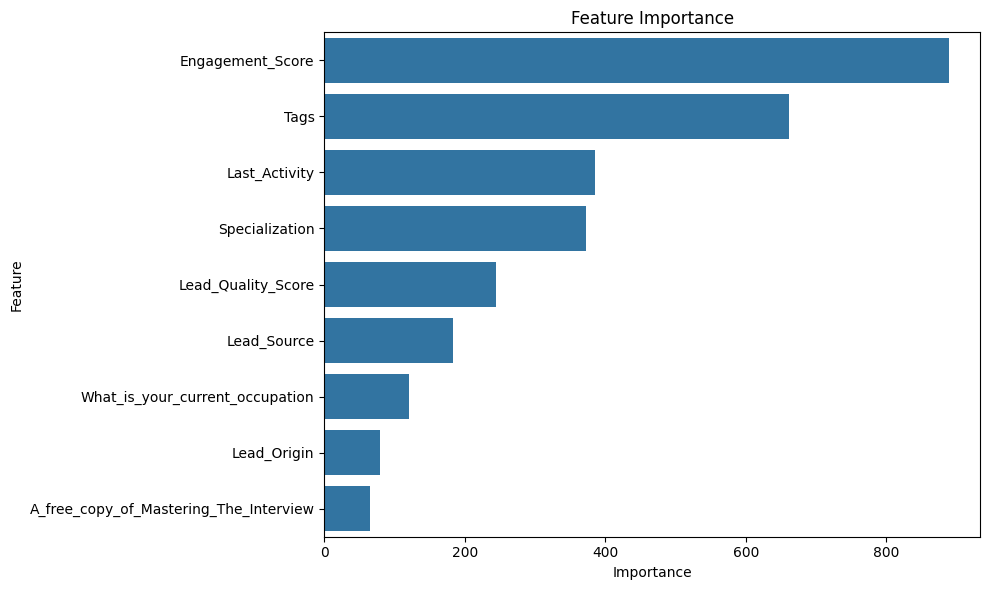

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and prepare features
X = df.drop(columns=['Converted'])  # Features
y = df['Converted']  # Target variable
X.columns = X.columns.str.replace(' ', '_')

# Create three-way split (train: 60%, test: 20%, predict: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=42, 
    stratify=y
)
X_test, X_predict, y_test, y_predict = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp
)

# Verify shapes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Prediction set: {X_predict.shape[0]} samples\n")

# Stratified K-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
    model.fit(X_fold_train, y_fold_train)
    
    y_pred_val = model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    accuracy_scores.append(accuracy)
    print(f"Fold {fold+1} Accuracy: {accuracy:.4f}")

print(f"\nAverage Cross-Validation Accuracy: {np.mean(accuracy_scores):.4f}")

# Train final model
final_model = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = final_model.predict(X_test)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

# Analyze prediction set
y_pred_predict = final_model.predict(X_predict)
y_pred_proba = final_model.predict_proba(X_predict)[:, 1]

# Create prediction analysis DataFrame
predictions_df = pd.DataFrame({
    'Index': X_predict.index,
    'Actual': y_predict,
    'Predicted': y_pred_predict,
    'Probability': y_pred_proba
})

# Calculate prediction set accuracy (if actual labels are available)
if not y_predict.isnull().all():
    predict_accuracy = accuracy_score(y_predict, y_pred_predict)
    print("\nPrediction Set Performance:")
    print(f"Accuracy: {predict_accuracy:.4f}")
    print(classification_report(y_predict, y_pred_predict))
    
    # Confusion matrix
    cm = confusion_matrix(y_predict, y_pred_predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title('Prediction Set Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("\nNo actual labels available for prediction set")

# Save predictions
predictions_df.to_csv('predictions_with_analysis.csv', index=False)
print("\nPredictions saved to 'predictions_with_analysis.csv'")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()